# MRI registration using ANTS

Perform some registration experiments using [ANTs](http://stnava.github.io/ANTs). This notebook is intended as knowledge repository of some of the existing possibilities of ANTs. The full documentation can be found [here](https://antspy.readthedocs.io/en/latest).

In [2]:
import os
import ants
import nibabel as nib
import numpy as np


Select a pair to images to register. In the first experiment, we register a T1-w from the WMH hyperintensity channel against the MNI T1-w template (1mm). 

Images are loaded using `ants.image_read`, which returns a `ANTsImage` object, reducing significantly loading times in comparison to `nibabel`:

In [17]:
MNI_TEMPLATE = '/home/sergivalverde/DATA/fsl/fsl-mni152-templates/MNI152_T1_1mm.nii.gz'
IM = '/home/sergivalverde/DATA/WMH2017/processed/0/T1.nii.gz'
fixed_image = ants.image_read(MNI_TEMPLATE)
moving_image = ants.image_read(IM)
fixed_image

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

## 1. Affine registration

Compute the **Affine** transformation using `ants.registration` function. `ANTs` supports more than twenty registration transformations including *Linear*, *Affine*, *Elastix*, *Syn*, etc.. See [here](https://antspy.readthedocs.io/en/latest/registration.html) for more information: 


In [20]:
%%time
mytx = ants.registration(fixed=fixed_image,
                        moving=moving_image,
                        type_of_transform='Affine')


CPU times: user 4min 48s, sys: 2.06 s, total: 4min 50s
Wall time: 13.4 s


On `mic`, the method registers the T1-w image against the MNI template in `13.3 secs`. The method returns a dictionary containing the moving image warped to the MNI space, the MNI image warped to the moving space and both the forward and backward transformations. Transformations are stored in a list, which means that several transformations can be concatenated to avoid interpolation. 

In [19]:
mytx

{'warpedmovout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (182, 218, 182)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (-90.0, 126.0, -72.0)
 	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'warpedfixout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (240, 240, 48)
 	 Spacing    : (0.9583, 0.9583, 3.0)
 	 Origin     : (-118.6107, -127.1819, 13.3168)
 	 Direction  : [ 0.9973  0.0503 -0.0535 -0.023   0.9059  0.4228  0.0697 -0.4204  0.9046],
 'fwdtransforms': ['/tmp/tmpglcfmmu70GenericAffine.mat'],
 'invtransforms': ['/tmp/tmpglcfmmu70GenericAffine.mat']}

Visualization is another awesome feature of ANTS. Plotting options are:

+ plot: with overlay between two images
+ ortho
+ ortho double
+ histogram
+ surf
+ surf function

The number of slices shown can be selected using `nslices` or particulary controlled by `slices` parameters. 
See [documentation](https://antspy.readthedocs.io/en/latest/vis.html) for more information.

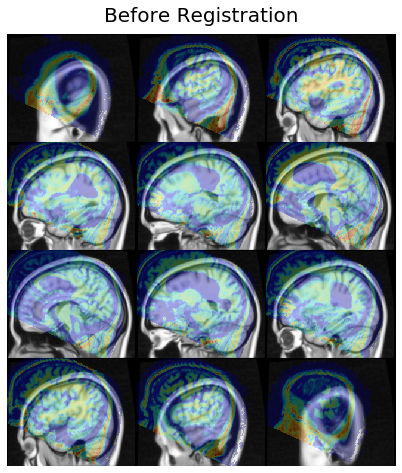

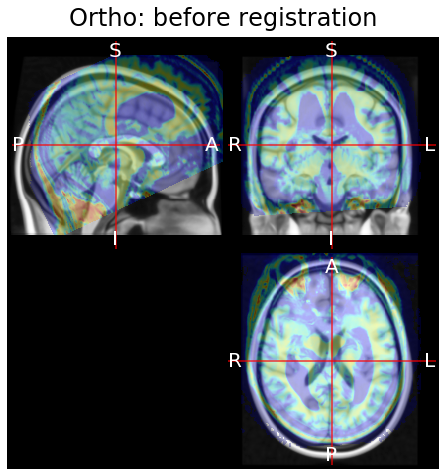

In [47]:
fixed_image.plot(overlay=moving_image, overlay_alpha=0.3, title='Before Registration'),
fixed_image.plot_ortho(overlay= moving_image, overlay_alpha=0.3, title='Ortho: before registration')

Saving the warped image is as simple as saving to a filename as `to_filename(im_path)`, similar to `nibabel`.

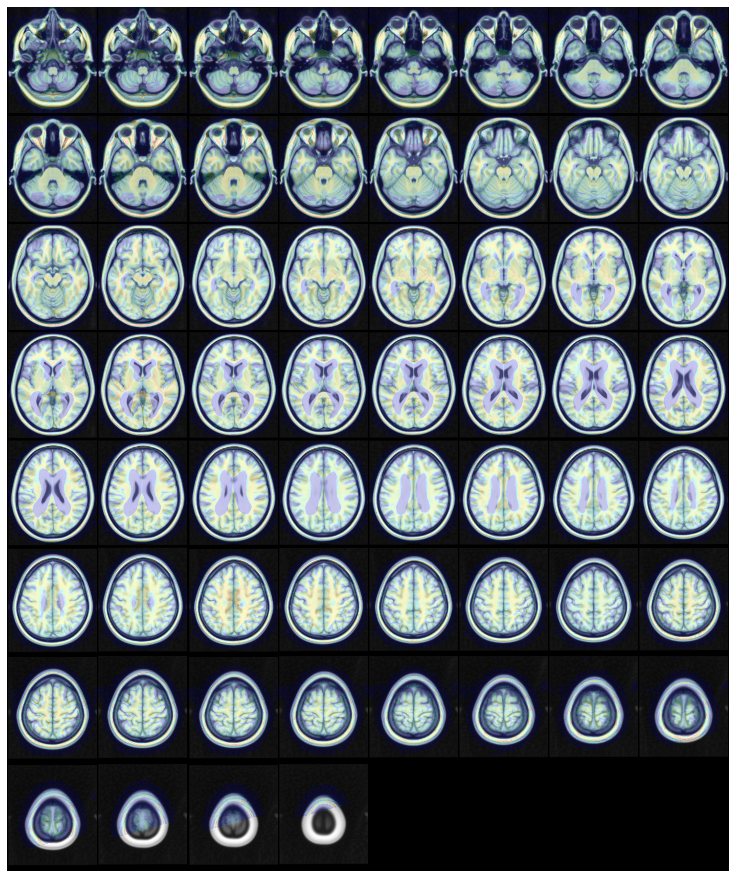

In [49]:
IM_OUT = '/home/sergivalverde/DATA/tmp/T1_MNI_rigid.nii.gz'
warped_moving = mytx['warpedmovout']
warped_moving.to_filename(IM_OUT)

# we show the final registration
fixed_image.plot(overlay=warped_moving, overlay_alpha=0.2, nslices=60, axis=2)